                    Method  Time (seconds)
0  Heap Merge (O(n log k))        0.519557
1      Naive Merge (O(nk))        8.690537


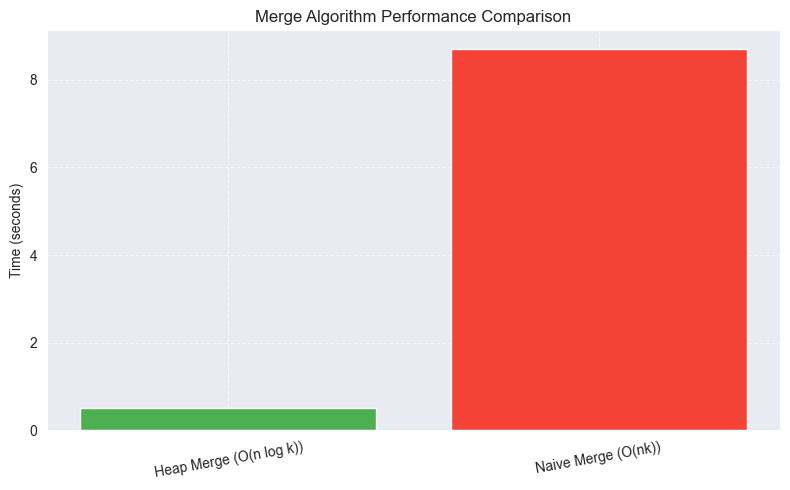

In [5]:
import heapq
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

SOURCE_FILE = "rand1000000.txt"  # Local file in same directory
NUM_SPLITS = 100
DATA_DIR = "rand100_lists"

# does output directory exist
os.makedirs(DATA_DIR, exist_ok=True)

# load + split
with open(SOURCE_FILE) as f:
    full_data = list(map(int, f.read().split()))

chunk_size = len(full_data) // NUM_SPLITS
sublists = [full_data[i * chunk_size:(i + 1) * chunk_size] for i in range(NUM_SPLITS)]

# sorting helper
def counting_sort(arr, exp):
    n = len(arr)
    output = [0]*n
    count = [0]*10
    for i in arr:
        index = (i // exp) % 10
        count[index] += 1
    for i in range(1, 10):
        count[i] += count[i-1]
    for i in reversed(arr):
        index = (i // exp) % 10
        output[count[index]-1] = i
        count[index] -= 1
    return output

def radix_sort(arr):
    if not arr:
        return arr
    max1 = max(arr)
    exp = 1
    while max1 // exp > 0:
        arr = counting_sort(arr, exp)
        exp *= 10
    return arr

def bucket_sort(arr):
    if not arr:
        return arr
    bucket_count = 10
    max_val = max(arr)
    size = (max_val + 1) / bucket_count
    buckets = [[] for _ in range(bucket_count)]
    for i in arr:
        index = int(i / size)
        if index == bucket_count:
            index -= 1
        buckets[index].append(i)
    for i in range(bucket_count):
        buckets[i].sort()
    return [item for sublist in buckets for item in sublist]

# sort sublist
for i in range(NUM_SPLITS):
    sorted_chunk = radix_sort(sublists[i]) if i < 50 else bucket_sort(sublists[i])
    with open(os.path.join(DATA_DIR, f"list_{i}.txt"), "w") as f:
        f.write("\n".join(map(str, sorted_chunk)))

# Load sorted lists
sorted_lists = []
for i in range(NUM_SPLITS):
    path = os.path.join(DATA_DIR, f"list_{i}.txt")
    with open(path) as f:
        sorted_lists.append(list(map(int, f.read().split())))

# Merging
def merge_k_lists_heap(lists):
    heap = []
    result = []
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))
    while heap:
        val, i, j = heapq.heappop(heap)
        result.append(val)
        if j + 1 < len(lists[i]):
            heapq.heappush(heap, (lists[i][j + 1], i, j + 1))
    return result

def merge_k_lists_naive(lists):
    result = []
    indices = [0] * len(lists)
    while True:
        min_val = float("inf")
        min_idx = -1
        for i, idx in enumerate(indices):
            if idx < len(lists[i]) and lists[i][idx] < min_val:
                min_val = lists[i][idx]
                min_idx = i
        if min_idx == -1:
            break
        result.append(min_val)
        indices[min_idx] += 1
    return result

start_heap = time.time()
merge_k_lists_heap(sorted_lists)
end_heap = time.time()

start_naive = time.time()
merge_k_lists_naive(sorted_lists)
end_naive = time.time()

# Report
performance_data = pd.DataFrame({
    "Method": ["Heap Merge (O(n log k))", "Naive Merge (O(nk))"],
    "Time (seconds)": [end_heap - start_heap, end_naive - start_naive]
})
print(performance_data)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(performance_data["Method"], performance_data["Time (seconds)"], color=["#4caf50", "#f44336"])
plt.title("Merge Algorithm Performance Comparison")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



